<a href="https://colab.research.google.com/github/afaale/ML/blob/ML/MNIST_CNN_99%25acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()
train_X, test_X = train_X / 255, test_X / 255


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [6]:
train_X[0].shape

(28, 28)

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units = 10, activation='softmax', ))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], )

In [8]:
history = model.fit(train_X, train_y, epochs=10, validation_split=0.1 )

Epoch 1/10
1688/1688 [==============================] - 20s 5ms/step - loss: 0.2778 - accuracy: 0.9125 - val_loss: 0.0654 - val_accuracy: 0.9832
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1084 - accuracy: 0.9667 - val_loss: 0.0490 - val_accuracy: 0.9867
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.9730 - val_loss: 0.0448 - val_accuracy: 0.9887
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0743 - accuracy: 0.9774 - val_loss: 0.0391 - val_accuracy: 0.9900
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0666 - accuracy: 0.9788 - val_loss: 0.0361 - val_accuracy: 0.9897
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0342 - val_accuracy: 0.9907
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0591 - accuracy: 0.9814 - val_loss: 0.0334 - val_accuracy

<Axes: >

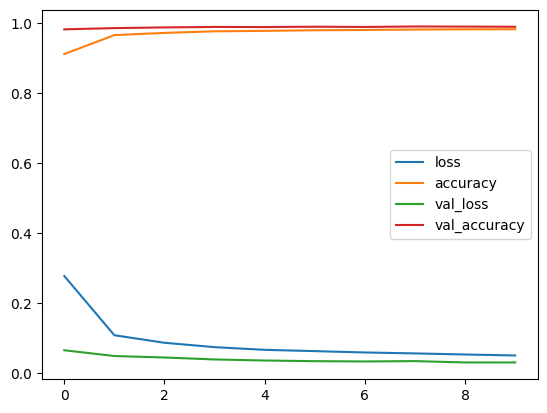

In [9]:
pd.DataFrame(history.history).plot()

In [10]:
model.evaluate(test_X, test_y, verbose=2)

313/313 - 1s - loss: 0.0272 - accuracy: 0.9902 - 647ms/epoch - 2ms/step


[0.027214551344513893, 0.9901999831199646]

In [12]:
model.save('mnist_99%acc.keras')